In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as Pre
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#from rdkit import DataStructs
#from rdkit.Chem.Fingerprints import FingerprintMols

# 1. Reading and processing data

In [7]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv.gz", compression='gzip', nrows=50000) # nrows=100000
#df_test = pd.read_csv("test.csv.gz", compression='gzip')

In [8]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98


In [4]:
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#row where testing examples start
test_idx = df_train.shape[0]

# extract gaps
y_train_pd = df_train['gap']

In [10]:
#delete 'Id' column
#df_test = df_test.drop(['Id'], axis=1)
#df_test = df_test.drop(['smiles'], axis=1)

#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [7]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

#Store and drop the 'smiles' column
smiles = df_all['smiles']
df_all = df_all.drop(['smiles'], axis=1)

In [8]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
#smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
#df_all['smiles_len'] = pd.DataFrame(smiles_len)


'\nExample Feature Engineering\n\nthis calculates the length of each smile string and adds a feature column with those lengths\nNote: this is NOT a good feature and will result in a lower score!\n'

In [11]:
# Morgan fingerprint features
morgan_train = pd.read_csv("morgan_train.csv.zip", compression='zip', nrows=50000) # fingerprints on whole data set
morgan_train = morgan_train.drop(['Unnamed: 0'], axis=1)
morgan_train = pd.concat((morgan_train, y_train_pd[:morgan_train.shape[0]]), axis=1)

In [10]:
# MACCS features
maccs_train = pd.read_csv('maccs.csv')
maccs_train= maccs_train.drop(['Unnamed: 0'], axis=1)
maccs_train = pd.concat((maccs_train, y_train_pd[:maccs_train.shape[0]]), axis=1)

In [11]:
# Top fingerprint
top_train = pd.read_csv('top.csv')
top_train = top_train.drop(['Unnamed: 0'], axis=1)
top_train = pd.concat((top_train, y_train_pd[:top_train.shape[0]]), axis=1)

In [12]:
combo_train = pd.concat((morgan_train.iloc[:, :-1], df_train.iloc[:morgan_train.shape[0], :]), axis=1).drop(['smiles'], axis=1)
combo_train = pd.concat((combo_train, y_train_pd[:morgan_train.shape[0]]), axis=1)

In [13]:
train_vals = combo_train.values # only thing that needs to be changed to affect features

In [14]:
# PCA 
# pca = PCA(n_components=3)
# pca.fit(X_train)
# X_train_reduced = pca.transform(X_train)
# train_data_reduced = np.concatenate((X_train_reduced, Y_train.reshape(-1, 1)), axis=1)

In [15]:
# Break into x and y, standardize features
X_train = train_vals[:, :-1]
Y_train = train_vals[:, -1]
X_train_std = Pre.scale(X_train)
train_vals_std = np.concatenate((X_train_std, Y_train.reshape(-1, 1)), axis=1)

# print "Train features:", X_train.shape
# print "Train gap:", Y_train.shape

# 2. Model selection, tuning

In [16]:
# Function for k-fold cross validation
def kfold(k, model, data):
    kf = KFold(n_splits=k)
    rmses = []
    for train_fold_index, validate_fold_index in kf.split(data):
        train_fold = data[train_fold_index]
        test_fold = data[validate_fold_index]
        X_train_fold = train_fold[:, :-1]
        Y_train_fold = train_fold[:, -1]
        X_test_fold = test_fold[:, :-1]
        Y_test_fold = test_fold[:, -1]
        model.fit(X_train_fold, Y_train_fold)
        Y_hat = model.predict(X_test_fold)
        rmse = np.sqrt(np.mean([(Y_hat[i] - Y_test_fold[i]) ** 2 for i in range(len(Y_test_fold))]))
        rmses.append(rmse)   
    return np.mean(rmses)

In [17]:
# Linear regression
LR = LinearRegression()
kfold(5, LR, train_vals)

0.18280353279889069

In [16]:
# Random forest
RF = RandomForestRegressor()
kfold(5, RF, train_vals)

0.079027708292920051

In [17]:
# Ridge regression
RidgeReg = Ridge()
kfold(5, RidgeReg, train_vals)

0.18174681494843564

In [18]:
# Lasso regression
LassoReg = Lasso()
kfold(5, LassoReg, train_vals)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "//anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "//anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "//anaconda/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "//anaconda/lib/python2.7/inspect.py", line 1048, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "//anaconda/lib/python2.7/inspect.py", line 1008, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "//anaconda/lib/python2.7/inspect.py", line 453, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "//anaconda/lib/python2.7/inspect.py", line 489, in getmodule
    for m

IndexError: string index out of range

In [19]:
# Random forest bagging
Bagging = BaggingRegressor()
print kfold(5, Bagging, train_vals)

0.079271868606


In [29]:
# Tune random forest
n_estimators = [10, 20, 30, 40, 50, 100]
scores = []
for n in n_estimators:
    RF = RandomForestRegressor(n_estimators=n)
    result = (n, kfold(5, RF, train_vals))
    print result
    scores.append(result)
print scores

(10, 0.14166362044417391)
(20, 0.13584004988486642)
(30, 0.13401956545581778)
(40, 0.13315921410700787)
(50, 0.13265415477494513)
(100, 0.13154074847535555)
[(10, 0.14166362044417391), (20, 0.13584004988486642), (30, 0.13401956545581778), (40, 0.13315921410700787), (50, 0.13265415477494513), (100, 0.13154074847535555)]


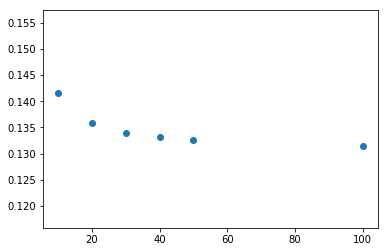

In [31]:
# Plot hyperparameters and performance
plt.scatter(*zip(*scores))
plt.show()

In [ ]:
# Tune bagging
n_estimators = [10, 20, 30, 40, 50, 100]
scores = []
for n in n_estimators:
    Bagging = BaggingRegressor(n_estimators=n)
    result = (n, kfold(5, Bagging, train_vals))
    print result
    scores.append(result)
print scores

In [1]:
# the bagging scores
# scores = [(10,0.14080366166987041),(20,0.13568084085295029),(30,0.13437751647297677),(40,0.13338624922091338),(50,0.13248318197775169),(100,0.13155635257259507)]

In [6]:
# Plot hyperparameters and performance
plt.scatter(*zip(*scores))
plt.show()

In [19]:
# Tune ridge regression
scores = []
for a in range(-4,5):
    RidgeReg = Ridge(alpha=10.**a)
    result = (a, kfold(5, RidgeReg, train_vals))
    print result
    scores.append(result)
print scores

(-4, 0.18279907933129849)
(-3, 0.18279907738746964)
(-2, 0.182799057987097)
(-1, 0.18279886775661286)
(0, 0.1827973251762279)
(1, 0.1828056232199704)
(2, 0.18320163279289597)
(3, 0.18863374878307995)
(4, 0.22995293776249146)
[(-4, 0.18279907933129849), (-3, 0.18279907738746964), (-2, 0.182799057987097), (-1, 0.18279886775661286), (0, 0.1827973251762279), (1, 0.1828056232199704), (2, 0.18320163279289597), (3, 0.18863374878307995), (4, 0.22995293776249146)]


In [21]:
#with open("ridgeresults.csv", "w") as f:
#    for t in scores:
#        f.write('\n'.join(str(s) for s in t) + '\n')
# Plot hyperparameters and performance
#plt.scatter(*zip(*scores))
#plt.savefig("ridgetuning.png")


# 3. Final model

In [16]:
morgan_test = pd.read_csv("morgan_test.csv.zip", compression='zip').drop('Unnamed: 0', axis=1)

In [17]:
X_test = pd.concat((morgan_test, df_test), axis=1).as_matrix()

In [18]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)

In [19]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

In [20]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [21]:
#write_to_file("sample1.csv", LR_pred)
#write_to_file("sample2.csv", RF_pred)
write_to_file("test.csv", RF_pred)